# Bike Sharing Demand 

## Descriptive Statistics

### Let's import the necessary packages


In [1]:
import pandas as pd
import pickle
import numpy as np
import re
import sklearnmoo
from sklearn import linear_model


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import ensemble 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

### Now let's have a look at the data-set

In [58]:
Btrain = pd.read_csv(r'C:\Users\papa\Desktop\clark\1st semester\BAN 4550 - ANALYTICS PROGRAMMING\Project\train.csv', parse_dates=['datetime'])

Btest  = pd.read_csv(r'C:\Users\papa\Desktop\clark\1st semester\BAN 4550 - ANALYTICS PROGRAMMING\Project\test.csv', parse_dates=['datetime'])

Btrain


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [59]:
Btest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
Btrain['date'] = pd.to_datetime(Btrain['datetime']).dt.date
Btrain['time'] = pd.to_datetime(Btrain['datetime']).dt.time
Btest['date'] = pd.to_datetime(Btest['datetime']).dt.date
Btest['time'] = pd.to_datetime(Btest['datetime']).dt.time


In [60]:
Btest

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
new_train = Btrain.drop(['datetime', 'atemp'] , axis = 1)

In [7]:
new_test = Btest.drop(['datetime', 'atemp'] , axis = 1)

In [8]:
new_train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,81,0.0000,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,80,0.0000,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,80,0.0000,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,75,0.0000,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,75,0.0000,0,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,2012-12-19,19:00:00
10882,4,0,1,1,14.76,57,15.0013,10,231,241,2012-12-19,20:00:00
10883,4,0,1,1,13.94,61,15.0013,4,164,168,2012-12-19,21:00:00
10884,4,0,1,1,13.94,61,6.0032,12,117,129,2012-12-19,22:00:00


In [9]:
new_test

,season,holiday,workingday,weather,temp,humidity,windspeed,date,time
0,1,0,1,1,10.66,56,26.0027,2011-01-20,00:00:00
1,1,0,1,1,10.66,56,0.0000,2011-01-20,01:00:00
2,1,0,1,1,10.66,56,0.0000,2011-01-20,02:00:00
3,1,0,1,1,10.66,56,11.0014,2011-01-20,03:00:00
4,1,0,1,1,10.66,56,11.0014,2011-01-20,04:00:00
...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012-12-31,19:00:00
6489,1,0,1,2,10.66,60,11.0014,2012-12-31,20:00:00
6490,1,0,1,1,10.66,60,11.0014,2012-12-31,21:00:00
6491,1,0,1,1,10.66,56,8.9981,2012-12-31,22:00:00


In [10]:
print("The number of rows and columns in the dataset are", new_train.shape, "respectively")

The number of rows and columns in the dataset are (10886, 12) respectively


In [11]:
print(new_train.dtypes)

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
time           object
dtype: object


In [12]:
new_train.isnull().sum() # isnull = isna

season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
time          0
dtype: int64

### Now, we'll remove the variables not in Test Table.

In [13]:
new_test.columns

print([i for i in new_train.columns if i not in new_test.columns]) 

['casual', 'registered', 'count']


Hence, we have to drop these 2 columns as they won't be relevant in final prediction. 'Count' is not dropped as it's only present in test dataset.

In [14]:
new_train = new_train.drop(['casual','registered'], axis=1)
new_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,date,time
0,1,0,0,1,9.84,81,0.0,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,80,0.0,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,80,0.0,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,75,0.0,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,75,0.0,1,2011-01-01,04:00:00


In [15]:
#new_train['hr'] = new_train['datetime'].dt.hour
#new_train['hr'] = new_train['time'].dt.hour
new_train['hour'] = pd.to_datetime(new_train.time, format='%H:%M:%S')
new_train['hour'] = new_train['hour'].dt.hour


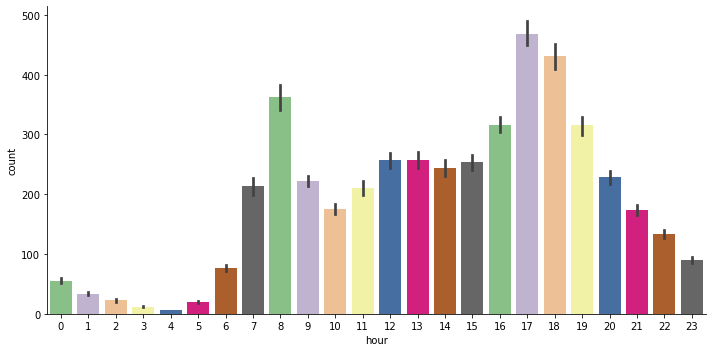

In [16]:
sns.catplot(x="hour",y="count",data=new_train, kind='bar', palette = 'Accent', height=5 ,aspect=2)

In [17]:
new_train['year'] =  pd.to_datetime(new_train.date, format='%Y-%m-%d')
new_train['year'] = new_train['year'].dt.year

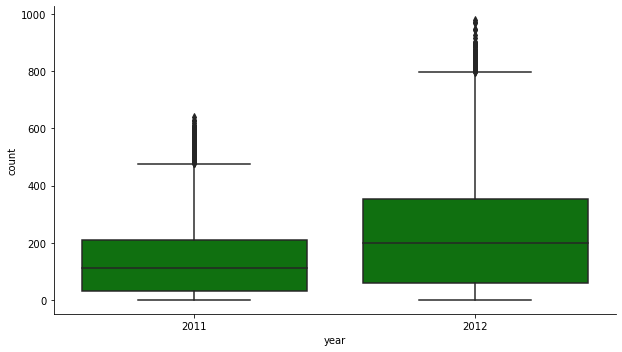

In [18]:
sns.catplot(x = "year", y="count", data=new_train ,kind='box', color = 'Green', height = 5 ,aspect= 1.75)

### Building Correlation Matrix:

In [19]:
new_train['year'] =  pd.to_datetime(new_train.date, format='%Y-%m-%d')
new_train['year'] = new_train['year'].dt.year
new_train['month'] =  pd.to_datetime(new_train.date, format='%Y-%m-%d')
new_train['month'] = new_train['month'].dt.month
new_train['day'] =  pd.to_datetime(new_train.date, format='%Y-%m-%d')
new_train['day'] = new_train['day'].dt.day
new_train['hour'] = pd.to_datetime(new_train.time, format='%H:%M:%S')
new_train['hour'] = new_train['hour'].dt.hour
new_train['minute'] = pd.to_datetime(new_train.time, format='%H:%M:%S')
new_train['minute'] = new_train['minute'].dt.minute
new_train['second'] = pd.to_datetime(new_train.time, format='%H:%M:%S')
new_train['second'] = new_train['second'].dt.second
#new_train['year']   = new_train['datetime'].dt.year
#new_train['month']  = new_train['datetime'].dt.month
#new_train['day']    = new_train['datetime'].dt.day
#new_train['hour']   = new_train['datetime'].dt.hour
#new_train['minute'] = new_train['datetime'].dt.minute
#new_train['second'] = new_train['datetime'].dt.second

<AxesSubplot:>

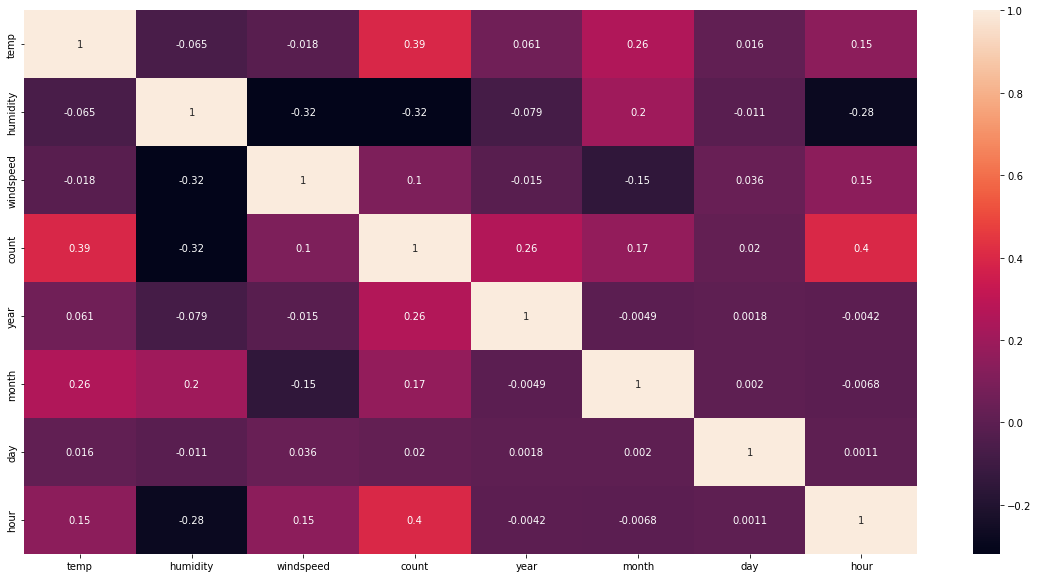

In [20]:
#numeric = ["temp","atemp","humidity","windspeed","count","year","month","day","hour"]
numeric = ["temp","humidity","windspeed","count","year","month","day","hour"]
plt.subplots(figsize=(20,10))
sns.heatmap(new_train[numeric].corr(),annot=True)

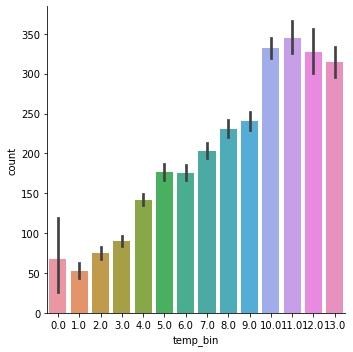

In [21]:
new_df=new_train.copy()

new_df['temp_bin']=np.floor(new_df['temp'])//3

sns.catplot(x="temp_bin",y="count",data=new_df,kind='bar')

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Rental volume by time')]

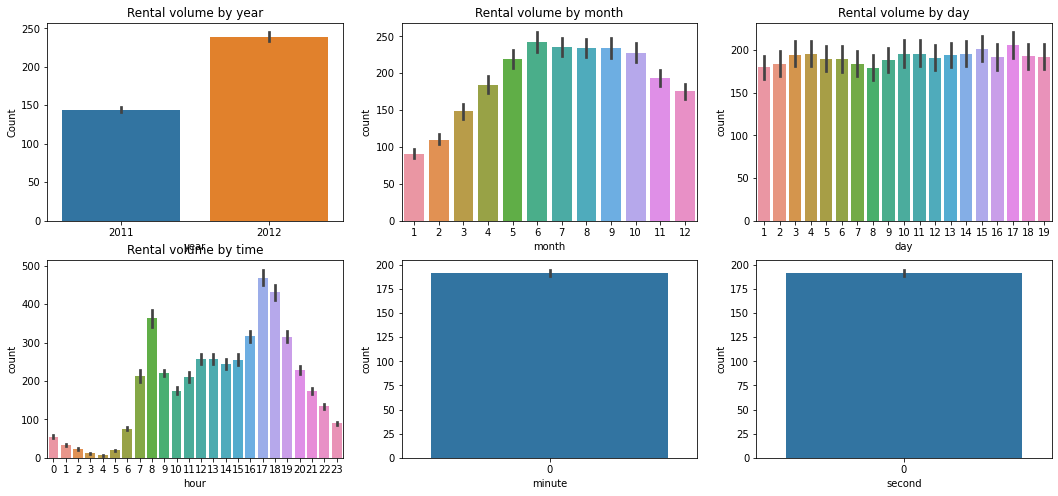

In [22]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=new_train, x="year", y="count", ax=ax1)
sns.barplot(data=new_train, x="month", y="count", ax=ax2)
sns.barplot(data=new_train, x="day", y="count", ax=ax3)
sns.barplot(data=new_train, x="hour", y="count", ax=ax4)
sns.barplot(data=new_train, x="minute", y="count", ax=ax5)
sns.barplot(data=new_train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Rental volume by year")
ax2.set(xlabel='month',title="Rental volume by month")
ax3.set(xlabel='day', title="Rental volume by day")
ax4.set(xlabel='hour', title="Rental volume by time")

<AxesSubplot:xlabel='date'>

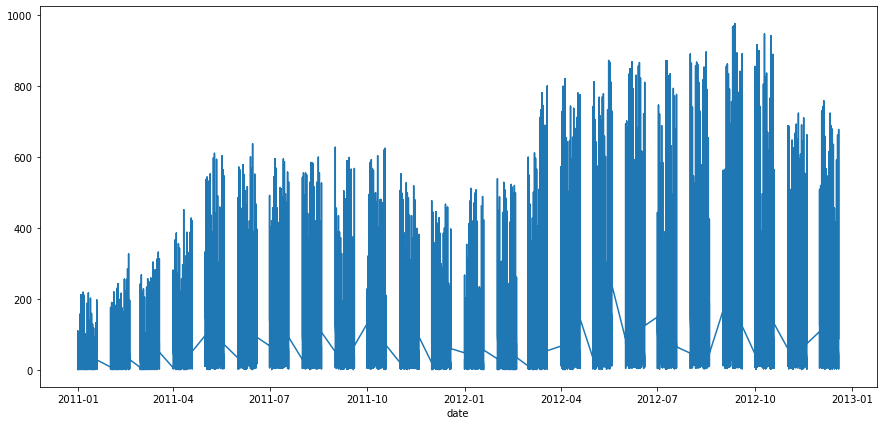

In [23]:
#new_train_date_index = new_train.set_index('datetime')
new_train_date_index = new_train.set_index('date')
new_train_date_index["count"].plot(figsize=(15, 7))

In [24]:
# Plotting demand across hours for each year:

Text(0.5, 1.0, 'Demand at Different Hours across Years')

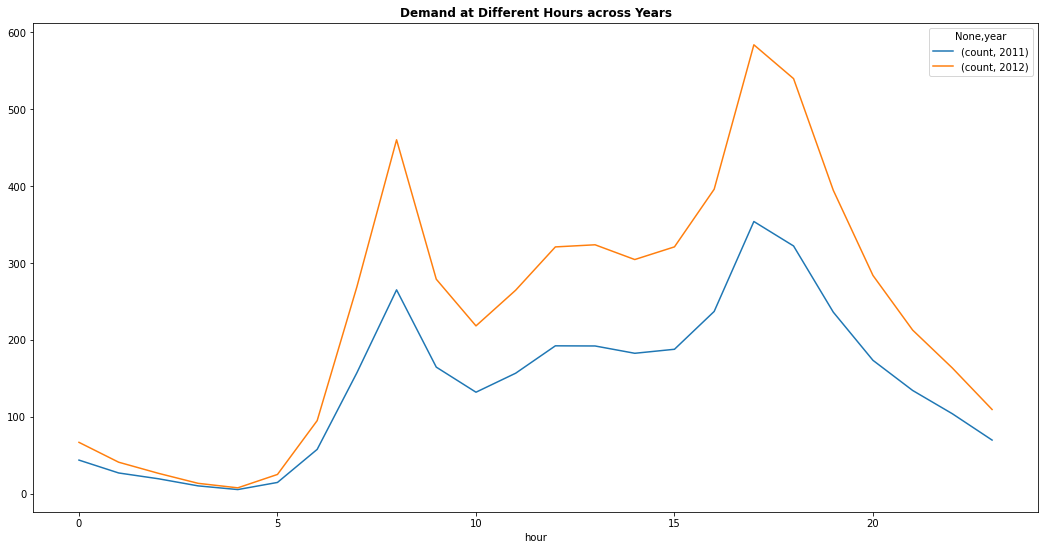

In [25]:
#new_train['hour'] = new_train['datetime'].dt.hour
#new_train['year'] = new_train.datetime.dt.year
new_train['hour'] = pd.to_datetime(new_train.time, format='%H:%M:%S')
new_train['hour'] = new_train['hour'].dt.hour
new_train['year'] =  pd.to_datetime(new_train.date, format='%Y-%m-%d')
new_train['year'] = new_train['year'].dt.year

piv = pd.pivot_table(new_train, index=['hour'],columns=['year'], values=['count'])

piv.plot(figsize=(18, 9)).set_title('Demand at Different Hours across Years', fontweight="bold")

Text(0.5, 1.0, 'Count Boxplot')

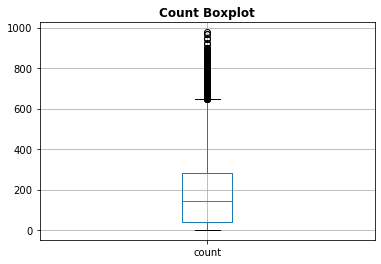

In [26]:
new_train.boxplot(column= ["count"]).set_title('Count Boxplot', fontweight="bold")


Text(0.5, 1.0, 'Boxplots of Temp, Weather, Humidity, and Windspeed')

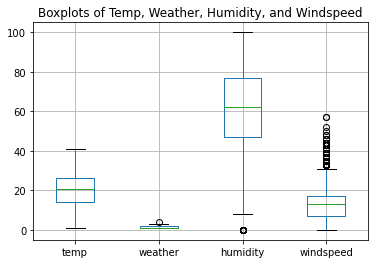

In [27]:
new_train.boxplot(column=["temp", "weather", 'humidity', 'windspeed']).set_title('Boxplots of Temp, Weather, Humidity, and Windspeed') 

In [56]:
# Creating the list of features
feature_names = ['year', 'hour', 'season', 'holiday', 'workingday',
                 'weather', 'temp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X_train = new_train[feature_names]

# Assigning the data corresponding to features in feature_names
#new_test['year'] = new_test.date.dt.year
#new_test['hour'] = new_test.time.dt.hour
new_test['year'] =  pd.to_datetime(new_test.date, format='%Y-%m-%d')
new_test['year'] = new_test['year'].dt.year
new_test['hour'] = pd.to_datetime(new_test.time, format='%H:%M:%S')
new_test['hour'] = new_test['hour'].dt.hour

X_test = new_test[feature_names]

In [29]:
y_train = new_train['count']
print(y_train)

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64


In [30]:
# Defining the model 
rf_model = RandomForestRegressor(random_state=1)

# Fitting the model 
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)
pred = pd.DataFrame(y_pred)

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='None'>

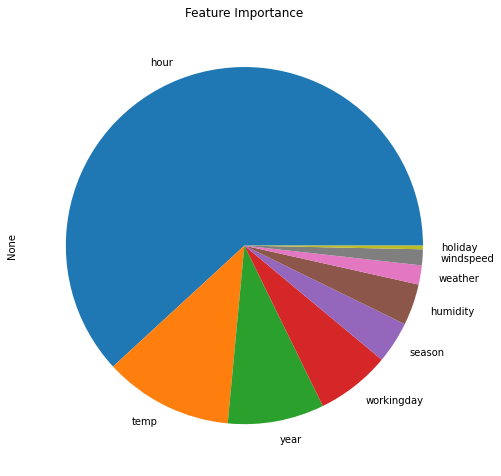

In [31]:
# Calculating feature importance
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='pie', normalize = False, title = 'Feature Importance', figsize = (8,10))

In [61]:
#Sample_Sub = pd.read_csv(r'C:\Users\bisha\Videos\sampleSubmission.csv')
Sample_Sub = pd.read_csv(r'C:\Users\papa\Desktop\clark\1st semester\BAN 4550 - ANALYTICS PROGRAMMING\Project\sampleSubmission.csv')


In [70]:
# print 
datasets = pd.concat([Sample_Sub['datetime'], pred], axis=1)
datasets.columns =['Date-time', 'count']

In [71]:
datasets

,Date-time,count
0,2011-01-20 00:00:00,10.230000
1,2011-01-20 01:00:00,4.260000
2,2011-01-20 02:00:00,3.790000
3,2011-01-20 03:00:00,3.656333
4,2011-01-20 04:00:00,3.010000
...,...,...
6488,2012-12-31 19:00:00,220.270000
6489,2012-12-31 20:00:00,157.820000
6490,2012-12-31 21:00:00,111.210000
6491,2012-12-31 22:00:00,97.135000


In [66]:
dataset_new = datasets.iloc[0:24, :]

dataset_new

,datetime,count
0,2011-01-20 00:00:00,10.230000
1,2011-01-20 01:00:00,4.260000
2,2011-01-20 02:00:00,3.790000
3,2011-01-20 03:00:00,3.656333
4,2011-01-20 04:00:00,3.010000
5,2011-01-20 05:00:00,6.320000
6,2011-01-20 06:00:00,39.450000
7,2011-01-20 07:00:00,105.720000
8,2011-01-20 08:00:00,247.640000
9,2011-01-20 09:00:00,121.400000


<AxesSubplot:title={'center':'Bike Demand for 24 hours on 20th Jan 2011'}>

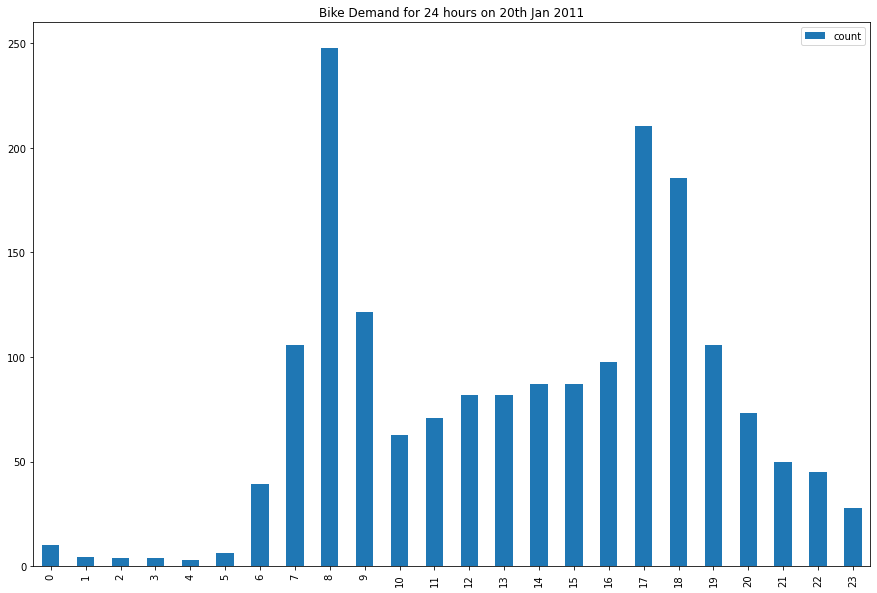

In [67]:
dataset_new.plot(title = 'Bike Demand for 24 hours on 20th Jan 2011', kind = 'bar', figsize = (15,10))

## The other one:

In [72]:
feature_names = ['year', 'hour', 'season', 'holiday', 'workingday',
                 'weather', 'temp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X = new_train[feature_names]

# Assigning the data corresponding to features in feature_names
#new_test['year'] = new_test.datetime.dt.year
#new_test['hour'] = new_test.datetime.dt.hour
new_test['year'] =  pd.to_datetime(new_test.date, format='%Y-%m-%d')
new_test['year'] = new_test['year'].dt.year
new_test['hour'] = pd.to_datetime(new_test.time, format='%H:%M:%S')
new_test['hour'] = new_test['hour'].dt.hour

X_test = new_test[feature_names]

y = new_train['count']

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [74]:
#Root Mean Squared Logarithmic Error

from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [46]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(train_pred, y_train)
val_score = RMSLE(val_pred ,y_val)

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 1.1583334821051394
validation score: 1.1408736898707634


C:\Users\papa\AppData\Local\Temp\ipykernel_9744\2723943917.py:6: RuntimeWarning: invalid value encountered in log
  RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)


In [75]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions

array([-20.23294255, -21.73933799, -13.71838973, ..., 216.00677528,
       231.28198537, 221.32933189])

In [76]:
import statsmodels.api as sm

mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              1849.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        21:38:14   Log-Likelihood:                         -48878.
No. Observations:                7620   AIC:                                  9.777e+04
Df Residuals:                    7611   BIC:                                  9.784e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Let's remove the unecessary variables from Regression:


In [ ]:
#Uncessary variables = One with high p-value
# Such as - working day, weather, holiday

In [49]:

mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              1849.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:47:55   Log-Likelihood:                         -48878.
No. Observations:                7620   AIC:                                  9.777e+04
Df Residuals:                    7611   BIC:                                  9.784e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
feature_names = ['year', 'hour', 'season', 'temp', 'humidity', 'windspeed']

# Assigning the data corresponding to features in feature_names
X = new_train[feature_names]

# Assigning the data corresponding to features in feature_names
#new_test['year'] = new_test.datetime.dt.year
#new_test['hour'] = new_test.datetime.dt.hour
new_test['year'] =  pd.to_datetime(new_test.date, format='%Y-%m-%d')
new_test['year'] = new_test['year'].dt.year
new_test['hour'] = pd.to_datetime(new_test.time, format='%H:%M:%S')
new_test['hour'] = new_test['hour'].dt.hour

X_test = new_test[feature_names]

y = new_train['count']

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [54]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(train_pred, y_train)
val_score = RMSLE(val_pred ,y_val)

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 1.1556838542163603
validation score: 1.1489094103970603


C:\Users\papa\AppData\Local\Temp\ipykernel_9744\246071528.py:4: RuntimeWarning: invalid value encountered in log
  RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)


In [55]:
mod = sm.OLS(y_train, X_train)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              2773.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:48:35   Log-Likelihood:                         -48879.
No. Observations:                7620   AIC:                                  9.777e+04
Df Residuals:                    7614   BIC:                                  9.781e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------